# Assignment 1 - Image Classification

This notebook contains the required task for the first assignment of the Deep Network Development course. Read the task description and implement the empty code cells. Each section represents a stage along implementing an image classifier, from loading and inspecting the dataset to training a **pre-trained** Convolutional Neural Network architecture. The sections are to guide you but you do not have to follow that specific order. 

Copy this notebook to your drive (File -> Save a copy in Drive), edit it and upload the final ipynb file to [Canvas](https://canvas.elte.hu) or upload the link to the Colab notebook itself. If you have your own machine with Jupyter installed, you can work there as well.

**Note** Make sure the notebook is using GPU accelerataion in Edit -> Notebook settings, otherwise training and evaluation can be very slow.

## Rules and Comments
- From the list of datasets and architectures listed in canvas, each student was atributed **1 dataset and 1 architecture** to use within this assignment. Please confirm yours in the Canvas assignment's description. 
- This is an DL class so to pass the homework you do have to implement a working classifier, just loading the data or having a "random-guess" performance is not enough.
- As always, copying others' code will make you fail the homework automatically (and thus the course). 
- **Deadline is October 19**
- Make sure your code can be run from an empty state (use Runtime -> Run all in the menu after restarting the notebook)
- Feel free to add more code cells as needed. But don't put code into external Python files to ease the reviewing.
- Please add your name and Neptun ID below for easier identification.

**Name: OUMAIMA DHAIDAH
 
**Neptun ID: RFLV2P

## Task description
Your task is to train an already pretrained Convolutional Neural Network architecture on a dataset, both given in canvas. The datasets contain images as input and class labels as target, thus you have to solve a Supervised Machine Learning Classification problem. 

The dataset shoud be divided into train, validation and test set, for which results should be presented for all.

You can either train the architecture you were given without changing its layers, or you can add more layers, if you believe it increases the accuracy. There is no expected percentage of accuracy, but **your accuracy should be better than random guessing and your loss has to decrease throughout the epochs**. We expect you to show visualisations (any of the following: matplotlib, seaborn, tensorboard, ...) of the accuracy and loss and use Early stopping while training your network.



## 0. Import libraries
Import all libraries/packages that you believe will help you fulfil the task, but **for the network only PyTorch can be used.**

In [67]:
# General imports
import torch
import torchvision 
import torchvision.transforms as transforms 
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 
import matplotlib.pyplot as plt 
import numpy as np 
from torchvision import datasets, transforms, models
import torch.utils.data as data
from torchvision.datasets import ImageFolder
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## 1. Dataset 
Load the dataset you were given. Images should be stored in an X variable and your labels in a Y variable. Split your dataset into train, validation and test set and pre-process your data for training.

#### Loading the dataset & Splitting the dataset
Show some images and labels of your dataset

In [3]:
!unzip '/content/drive/MyDrive/caltech-101.zip'

Streaming output truncated to the last 5000 lines.
  inflating: caltech-101/test/chandelier/image_0023.jpg  
  inflating: caltech-101/test/chandelier/image_0024.jpg  
  inflating: caltech-101/test/chandelier/image_0025.jpg  
  inflating: caltech-101/test/chandelier/image_0026.jpg  
  inflating: caltech-101/test/chandelier/image_0027.jpg  
  inflating: caltech-101/test/chandelier/image_0028.jpg  
  inflating: caltech-101/test/chandelier/image_0029.jpg  
  inflating: caltech-101/test/chandelier/image_0030.jpg  
  inflating: caltech-101/test/chandelier/image_0031.jpg  
  inflating: caltech-101/test/chandelier/image_0032.jpg  
  inflating: caltech-101/test/chandelier/image_0033.jpg  
  inflating: caltech-101/test/chandelier/image_0034.jpg  
  inflating: caltech-101/test/chandelier/image_0035.jpg  
  inflating: caltech-101/test/chandelier/image_0036.jpg  
  inflating: caltech-101/test/chandelier/image_0037.jpg  
  inflating: caltech-101/test/chandelier/image_0038.jpg  
  inflating: caltech-

In [71]:
train_path  = '../content/caltech-101/101_ObjectCategories'
test_path  = '../content/caltech-101/test'
valid_path  = '../content/caltech-101/validation'
 #transform data to tensor and we resize images to (224,224),VGG-16 only accepts that image size
trans_form = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])
 #how many samples per batch to load
batch_size = 32
train_set = torchvision.datasets.ImageFolder(train_path, transform = trans_form)
test_set = torchvision.datasets.ImageFolder(test_path, transform = trans_form)
valid_set = torchvision.datasets.ImageFolder(valid_path, transform = trans_form)

train_loader = data.DataLoader(train_set, batch_size=batch_size , shuffle=True)
test_loader = data.DataLoader(test_set, batch_size=batch_size , shuffle=False, num_workers=2)
valid_loader = data.DataLoader(test_set, batch_size=batch_size , shuffle=False, num_workers=2)


In [72]:
cls = train_set.classes

In [73]:
cls

['BACKGROUND_Google',
 'Faces',
 'Faces_easy',
 'Leopards',
 'Motorbikes',
 'accordion',
 'airplanes',
 'anchor',
 'ant',
 'barrel',
 'bass',
 'beaver',
 'binocular',
 'bonsai',
 'brain',
 'brontosaurus',
 'buddha',
 'butterfly',
 'camera',
 'cannon',
 'car_side',
 'ceiling_fan',
 'cellphone',
 'chair',
 'chandelier',
 'cougar_body',
 'cougar_face',
 'crab',
 'crayfish',
 'crocodile',
 'crocodile_head',
 'cup',
 'dalmatian',
 'dollar_bill',
 'dolphin',
 'dragonfly',
 'electric_guitar',
 'elephant',
 'emu',
 'euphonium',
 'ewer',
 'ferry',
 'flamingo',
 'flamingo_head',
 'garfield',
 'gerenuk',
 'gramophone',
 'grand_piano',
 'hawksbill',
 'headphone',
 'hedgehog',
 'helicopter',
 'ibis',
 'inline_skate',
 'joshua_tree',
 'kangaroo',
 'ketch',
 'lamp',
 'laptop',
 'llama',
 'lobster',
 'lotus',
 'mandolin',
 'mayfly',
 'menorah',
 'metronome',
 'minaret',
 'nautilus',
 'octopus',
 'okapi',
 'pagoda',
 'panda',
 'pigeon',
 'pizza',
 'platypus',
 'pyramid',
 'revolver',
 'rhino',
 'rooste

#### Pre-processing the dataset

lotus BACKGROUND_Google euphonium watch watch snoopy elephant  bass beaver starfish ketch airplanes scissors Motorbikes starfish hawksbill pigeon barrel hawksbill  ibis joshua_tree minaret ketch gerenuk Faces watch flamingo airplanes nautilus Motorbikes elephant crayfish


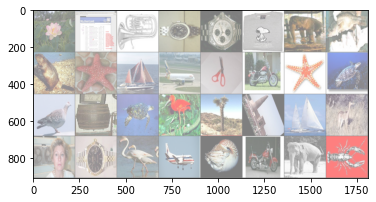

In [74]:
from torchvision.models.resnet import ImageClassification
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     #because images were normalized when loaded, for visualization purposes we unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) #reorder the channels 
    plt.show()
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()


# print labels
print(' '.join('%5s' % cls[labels[j]] for j in range(batch_size)))
# show images
imshow(torchvision.utils.make_grid(images))


## 2. Convolutional Neural Network Architecture
Load the CNN architecture you were given using pretrained weights. Define the optimizer and loss function. Train your network and save it. Remember to use Early stopping and show results.

#### Load the architecture

In [83]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

device(type='cuda')

In [82]:
is_cuda=torch.cuda.is_available()

In [85]:
def intoDevice(data, device):
    if isinstance(data, (list,tuple)):
        return [intoDevice(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [88]:
model_arct = models.vgg16(pretrained=True)

In [89]:
model_arct.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [90]:
model_arct.features[30]

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

In [91]:
model_arct.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [92]:
#print the out_features of last layer
model_arct.classifier[6].out_features

1000

In [93]:
# We need to freeze pretrained model parameters
for parameter in model_arct.parameters():
    parameter.requires_grad = False
n_inputs = model_arct.classifier[6].in_features

# new layers 
last_layer = nn.Linear(n_inputs, len(cls))
model_arct.classifier[6] = last_layer

# if GPU is available, move the model to GPU
if is_cuda:
    model_arct.cuda()
# check to see that your last layer produces the expected number of outputs
print(model_arct.classifier[6].out_features)
print(model_arct)

102
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilati

#### Define your optimizer and loss function

In [94]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_arct.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.Adam(model_arct.parameters(), lr=0.001)

In [95]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

#### Train your network

In [174]:

NUM_EPOCHS=3

for epoch in range(NUM_EPOCHS):  # loop over the dataset multiple times
    print(f'- Epoch {epoch+1}:')
    running_loss = 0.0

    for i, data in enumerate(train_loader, 0):
        inputs = inputs.to(device)
        
        labels = labels.to(device)
        labels_hat = model_arct(inputs)

        n_corrects = (labels_hat.argmax(axis=1)==labels).sum().item()
        loss_value = criterion(labels_hat, labels)

        loss_value.backward()
        
        optimizer.step()
        optimizer.zero_grad()
    
        if (i+1) % 40 == 0:
          print(f"==> Step: {i+1}/{len(train_loader)}, loss = {loss_value:.5f} and accuracy = {100*(n_corrects/labels.size(0)):.2f}%")
          
    print()
    

- Epoch 1:
==> Step: 40/286, loss = 0.00454 and accuracy = 100.00%
==> Step: 80/286, loss = 0.00309 and accuracy = 100.00%
==> Step: 120/286, loss = 0.00284 and accuracy = 100.00%
==> Step: 160/286, loss = 0.00268 and accuracy = 100.00%
==> Step: 200/286, loss = 0.00256 and accuracy = 100.00%
==> Step: 240/286, loss = 0.00456 and accuracy = 100.00%
==> Step: 280/286, loss = 0.00455 and accuracy = 100.00%

- Epoch 2:
==> Step: 40/286, loss = 0.00353 and accuracy = 100.00%
==> Step: 80/286, loss = 0.00257 and accuracy = 100.00%
==> Step: 120/286, loss = 0.00333 and accuracy = 100.00%
==> Step: 160/286, loss = 0.00215 and accuracy = 100.00%
==> Step: 200/286, loss = 0.00397 and accuracy = 100.00%
==> Step: 240/286, loss = 0.00317 and accuracy = 100.00%
==> Step: 280/286, loss = 0.00333 and accuracy = 100.00%

- Epoch 3:
==> Step: 40/286, loss = 0.00253 and accuracy = 100.00%
==> Step: 80/286, loss = 0.00144 and accuracy = 100.00%
==> Step: 120/286, loss = 0.00226 and accuracy = 100.00%
==

## 3. Conclusion (Evaluation)
Load your trained CNN and evaluate it on the test set. Show some predictions on the test set (3 is enough) by ploting the image and printing the prediction and ground truth.

How good are your results? Do you think the network is overfitted or underfitted? If yes, what do you think lead to that? If not, justify.

#### Evaluate your model

In [161]:
n_correct,total = 0,0

In [162]:
for i, (testing_img , testing_label) in enumerate(train_loader):
    testing_img = testing_img.to(device)
    testing_label = testing_label.to(device)
    
    y_predicted = model_arct(testing_img)
    prediction = y_predicted.argmax(axis = 1)
    n_correct += (prediction==testing_label).sum().item()
    total += testing_label.size(0)

print(f"==> Acuracy : {(n_correct / total) * 100} %")

==> Acuracy : 81.45231846019247%


#### Show some predictions

In [173]:
def Predict_Label(img):
    input, label = train_set[img]
    plt.imshow(input.permute(1, 2, 0))

    batch_of_1 = intoDevice(input.unsqueeze(0), device)
    model_predicting = model_arct(batch_of_1)

    probabilities, predictions  = torch.max(model_predicting, dim=1)
    prediction = train_set.classes[predictions[0].item()]

    print('==> Actual label:', train_set.classes[label], ' ==> Predicted:', prediction) 

==> Actual label: BACKGROUND_Google  ==> Predicted: BACKGROUND_Google


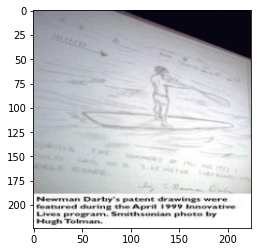

In [172]:
Predict_Label(339)

==> Actual label: airplanes  ==> Predicted: airplanes


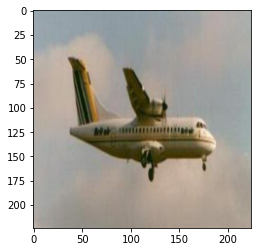

In [171]:
Predict_Label(2600)

==> Actual label: Motorbikes  ==> Predicted: Motorbikes


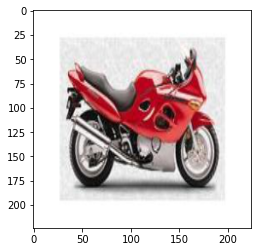

In [170]:
Predict_Label(2000)

==> Actual label: Leopards  ==> Predicted: Leopards


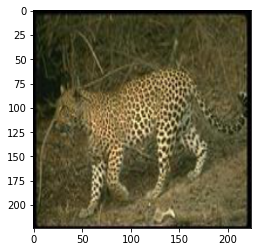

In [176]:
Predict_Label(1485)

==> Actual label: Faces  ==> Predicted: Faces


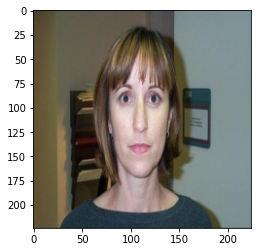

In [168]:
Predict_Label( 553)

==> Actual label: airplanes  ==> Predicted: airplanes
==> Actual label: brain  ==> Predicted: brain
==> Actual label: cellphone  ==> Predicted: stop_sign
==> Actual label: airplanes  ==> Predicted: llama
==> Actual label: cellphone  ==> Predicted: stop_sign
==> Actual label: cellphone  ==> Predicted: cellphone
==> Actual label: Faces  ==> Predicted: Faces
==> Actual label: gramophone  ==> Predicted: gramophone
==> Actual label: grand_piano  ==> Predicted: grand_piano
==> Actual label: cellphone  ==> Predicted: cellphone
==> Actual label: Leopards  ==> Predicted: wild_cat
==> Actual label: Motorbikes  ==> Predicted: Motorbikes
==> Actual label: cougar_face  ==> Predicted: cougar_face
==> Actual label: ant  ==> Predicted: ant
==> Actual label: airplanes  ==> Predicted: airplanes
==> Actual label: Motorbikes  ==> Predicted: Motorbikes
==> Actual label: airplanes  ==> Predicted: airplanes
==> Actual label: Faces  ==> Predicted: Faces
==> Actual label: Motorbikes  ==> Predicted: Motorbikes


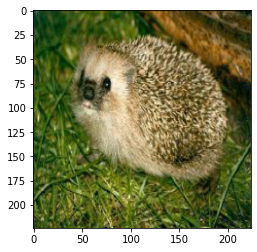

In [167]:
import random
for i in range(20):
  Predict_Label(random.randrange(2, 6000))